In [1]:
# Import any Libraries
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, spearmanr
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats


Note: you may need to restart the kernel to use updated packages.


# Import Data into DataFrame

In [2]:
# import dataset 
# link: https://www.kaggle.com/datasets/poonamnema/heart-disease-all-models
heart_df = pd.read_csv('heart_disease.csv')
heart_df


,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


# Short Summary of Each Variable

- Gender: Indicates the biological sex of the individual. 
- Age: Represents the age of the individual.
- Education: Reflects the highest level of education attained by the individual (e.g., uneducated, primary school, graduate, postgraduate).
- Current Smoker: A binary indicator showing whether the individual currently smokes tobacco.
- Cigs Per Day: Quantifies the average number of cigarettes smoked per day by the individual.
- BPMeds: A binary indicator showing whether the individual is on blood pressure medication or not. 
- Prevalent Stroke: Indicates whether the individual has had a stroke in the past.
- Prevalent Hyp: A binary indicator of whether the individual has hypertension or not. 
- Diabetes: Indicates whether the individual has diabetes or not. 
- TotChol: Total cholesterol level in the blood.
- SysBP: Systolic blood pressure, measuring the pressure in the arteries when the heart beats.
- DiaBP: Diastolic blood pressure, measuring the pressure in the arteries between heartbeats.
- BMI: Body Mass Index, a measure of body fat based on height and weight.
- Heart Rate: The number of heartbeats per minute.
- Glucose: Blood glucose levels. 
- Heart Stroke: A binary outcome indicating whether the individual has been diagnosed with a stroke. This is the target variable the predictive model aims to forecast based on the input features.

# Data Preparation 

In [3]:
# display the dimensions
dimensions = heart_df.shape
print(f"Dimensions of the DataFrame: {dimensions}")

# indicate if the variables have suitable types
variable_types = heart_df.dtypes
print("\nVariable Types:")
print(variable_types)

Dimensions of the DataFrame: (4238, 16)

Variable Types:
Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object


## Convert Data Type to Suitable Date Type

In [4]:
# convert data type to suitable data types
heart_df['Gender'] = heart_df['Gender'].astype('category')
heart_df['education'] = heart_df['education'].astype('category')
heart_df['currentSmoker'] = heart_df['currentSmoker'].astype('category')
heart_df['cigsPerDay'] = heart_df['cigsPerDay'].astype('Int64')
heart_df['BPMeds'] = heart_df['BPMeds'].astype('category')
heart_df['prevalentStroke'] = heart_df['prevalentStroke'].astype('category')
heart_df['prevalentHyp'] = heart_df['prevalentHyp'].astype('category')
heart_df['diabetes'] = heart_df['diabetes'].astype('category')
heart_df['totChol'] = heart_df['totChol'].astype('Int64')
heart_df['heartRate'] = heart_df['heartRate'].astype('Int64')
heart_df['glucose'] = heart_df['glucose'].astype('Int64')
heart_df['Heart_ stroke'] = heart_df['Heart_ stroke'].map({'yes': 1, 'No': 0})
# The mapping converts 'Heart_ storoke' data type from object to float64.
# It might be efficeint to convert float64 to type int64 for ML analysis. 
heart_df['Heart_ stroke'] = heart_df['Heart_ stroke'].astype('Int64')

# display the converted data type
variable_types_after_conversion = heart_df.dtypes
print("\nVariable Types:")
print(variable_types_after_conversion)


Variable Types:
Gender             category
age                   int64
education          category
currentSmoker      category
cigsPerDay            Int64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol               Int64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate             Int64
glucose               Int64
Heart_ stroke         Int64
dtype: object


## Handle Missing Values

In [5]:
# check the frequency of missing values in each column
print("Missing values per column:\n", heart_df.isnull().sum(axis=0).sort_values(ascending = False))

Missing values per column:
 glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
Gender               0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
Heart_ stroke        0
dtype: int64


In [6]:
# check the frequency of missing values in each row
print("Missing values per row:\n", heart_df.isnull().sum(axis=1).sort_values(ascending = False))

Missing values per row:
 1747    3
1122    3
1785    2
2417    2
154     2
       ..
1508    0
1509    0
1510    0
1511    0
4237    0
Length: 4238, dtype: int64


In [7]:
# column-wise missing value percentage
missing_percent_col = ((heart_df.isnull().sum() / len(heart_df)) * 100).round(2)
print("Percentage of missing values per column:\n", missing_percent_col.sort_values(ascending = False))

Percentage of missing values per column:
 glucose            9.16
education          2.48
BPMeds             1.25
totChol            1.18
cigsPerDay         0.68
BMI                0.45
heartRate          0.02
Gender             0.00
age                0.00
currentSmoker      0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
Heart_ stroke      0.00
dtype: float64


In [8]:
# row-wise missing value percentage
missing_percent_row = ((heart_df.isnull().sum(axis=1) / heart_df.shape[1]) * 100).round(2)
print("Percentage of missing values per row:\n", missing_percent_row.sort_values(ascending = False))

Percentage of missing values per row:
 1747    18.75
1122    18.75
1785    12.50
2417    12.50
154     12.50
        ...  
1508     0.00
1509     0.00
1510     0.00
1511     0.00
4237     0.00
Length: 4238, dtype: float64


In [9]:
# count and percentage of missing values in 'Heart_stroke'
missing_heart_stroke = heart_df['Heart_ stroke'].isnull().sum()
percent_missing_heart_stroke = (missing_heart_stroke / len(heart_df)) * 100

print(f"Missing values in 'Heart_stroke': {missing_heart_stroke}")
print(f"Percentage of missing values in 'Heart_stroke': {percent_missing_heart_stroke:.2f}%")

Missing values in 'Heart_stroke': 0
Percentage of missing values in 'Heart_stroke': 0.00%


Out of the entire dataset, which consists of 4,238 entries, we've identified that 8 data types exhibit missing values within the range of 1 to 644. Although this discrepancy represents a minor fraction of the dataset (the biggest missing data takes up 15% of our dataset), the presence of missing values can potentially impact the integrity of our data analysis. 

Since 'Heart_stroke' is the target variable to determine the predictive model that aims to forecast based on the input features, it is essential to remove records with missing 'Heart_stroke' values to ensure the integrity and accuracy of the model prediction.

To mitigate this issue, we will substitute missing values for key indicators—such as glucose, total cholesterol (totChol), cigarettes per day (cigsPerDay), Body Mass Index (BMI), and a solitary instance of heartRate with their median values. This approach will help maintain the robustness of our dataset.

For missing values of categorical data such as 'education', and 'BPMeds', we will substiture missing values with their mode.

In [10]:
# delete entire rows with missing values with 'Heart_stroke.'
heart_df.dropna(subset=['Heart_ stroke'], inplace=True)

# check the frequency of null values
print(heart_df.isnull().sum(axis=0).sort_values(ascending = False))

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
Gender               0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
Heart_ stroke        0
dtype: int64


In [11]:
# perform imputation 

# impute missing values for numerical data with median
numerical_columns = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']
heart_df[numerical_columns] = heart_df[numerical_columns].apply(lambda x: x.fillna(x.median()))

# impute missing values for categorical data with mode
categorical_columns = ['education', 'BPMeds']
heart_df[categorical_columns] = heart_df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))


# Check the frequency of null values
print(heart_df.isnull().sum(axis=0).sort_values(ascending = False))

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64


Now, we are going to justify approach to handling negative amounts.

In [12]:
# Investigate rows with negative values for any column

# Create a function to count negative values across all columns
def count_negative_values(df):
    
    # Filter for columns with numeric data types
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Apply a lambda function to check for negative values across each numeric column
    negative_counts = df[numeric_cols].apply(lambda x: (x < 0).sum())
    
    # Sort the counts in descending order
    sorted_negative_counts = negative_counts.sort_values(ascending=False)
    return sorted_negative_counts


# Call the function and print the results
negative_values = count_negative_values(heart_df)
print(negative_values)

age              0
cigsPerDay       0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Heart_ stroke    0
dtype: int64


No data preparation is needed to change negative values in our dataset. 

Before we move on, we will look for any imbalances in the dataset regarding positive vs. negative stroke diagnoses counts.

In [31]:
print(heart_df['Heart_ stroke'].value_counts())

Heart_ stroke
0    3226
1     526
Name: count, dtype: Int64


As we can see, there is a large imbalance between positive and negative entries. We will use oversampling later on to try and combat this.

Next, we will remove outliers based on IQR. We will remove entries where a value in one of its columns is outside of the IQR. 

In [14]:
# define function to remove outliers for each numerical column based on IQR
def remove_outliers(df, column_list):
    for column in column_list:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numerical_columns = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']
print("shape before cleaning:", heart_df.shape)
heart_df = remove_outliers(heart_df, numerical_columns)
print("shape after cleaning:", heart_df.shape)



shape before cleaning: (4238, 16)
shape after cleaning: (3752, 16)


We are now done with preparing the data, so we will begin doing some visualizations to help us get a better understanding of the dataset and help inform our analysis later on. We will start by looking at some of the explanatory variables and their potential relation to whether or not a patient had a heart stroke to find potential correlations. 

## Univariate Analysis for Age

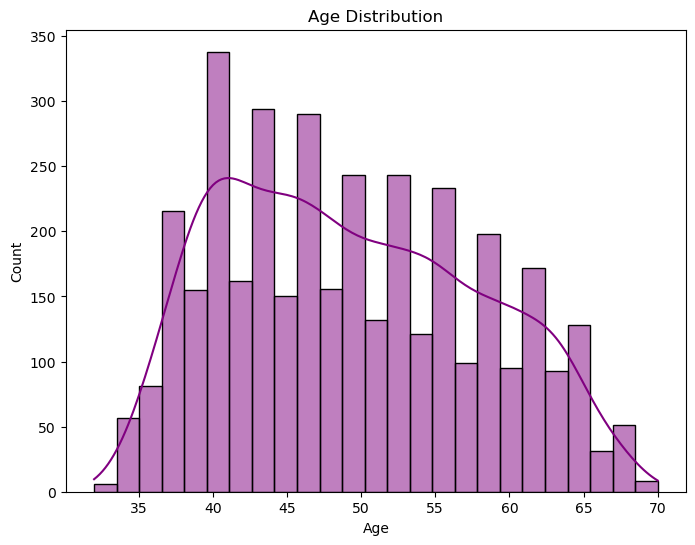


Additional info about the age column is as follows:
Mean Age: 49.26
Mode Age: 40 (Count: 180)
Skewness of Age: 0.27
Column has a right-skew.


In [15]:
# Univariate Analysis for Age
plt.figure(figsize=(8, 6))
sns.histplot(heart_df['age'], bins=25, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Extra information for Age
age_mean = heart_df['age'].mean().round(2)
age_mode = heart_df['age'].mode().values[0].round(2)
age_mode_count = heart_df['age'].value_counts().max()  
age_skewness = heart_df['age'].skew().round(2)

print("\nAdditional info about the age column is as follows:")
print(f"Mean Age: {age_mean}")
print(f"Mode Age: {age_mode} (Count: {age_mode_count})")

print(f"Skewness of Age: {age_skewness}")

# Finding the skew pattern
if age_skewness > 0:
    print("Column has a right-skew.")
elif age_skewness < 0:
    print("Column has a left-skew.")
else:
    print("Column is symmetric.")

The average age of individuals in the dataset is approximately 49.26 years. The most frequent age observed is 40 years, with a count of 180 occurrences. This indicates that 40 is the age most individuals in the dataset share. The skewness value of 0.27 indicates a slight right-skew in the age distribution. This means that the distribution is slightly asymmetrical, with a longer tail on the right side. This suggests that there are relatively more individuals with ages older than the mean age, pulling the distribution towards the right. This skewness pattern implies that while the majority of individuals are clustered around the mean age, there's a smaller but noticeable number of individuals who are older than the mean age.

## Correlation between Age and Total Cholesterol

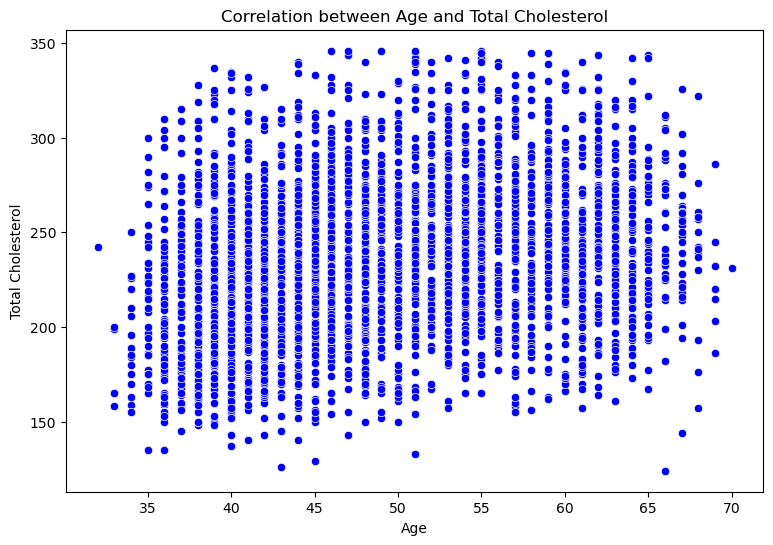


More info about the Relationship between Age and Total Cholesterol:
Correlation between Age and Total Cholesterol: 0.27213490707753013
P-value: 1.0563100327083203e-64
The correlation strength is positive correlation.
The correlation is pretty weak.


In [16]:
from scipy.stats import pearsonr

# correlation between Age and Total Cholesterol (totChol)
plt.figure(figsize=(9, 6))
sns.scatterplot(x='age', y='totChol', data=heart_df, color='blue')
plt.title('Correlation between Age and Total Cholesterol')
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')
plt.show()

# Calculating the Pearson Correlation coefficient
correlation, p_value = pearsonr(heart_df['age'], heart_df['totChol'])

print("\nMore info about the Relationship between Age and Total Cholesterol:")
print(f"Correlation between Age and Total Cholesterol: {correlation}")
print(f"P-value: {p_value}")

# Finding the correlation strength
if correlation > 0:
    strength = "positive correlation"
elif correlation < 0:
    strength = "negative correlation"
else:
    strength = "no correlation"

print(f"The correlation strength is {strength}.")

# More analysis 
if abs(correlation) >= 0.7:
    print("The correlation is quite strong.")
elif 0.5 <= abs(correlation) < 0.7:
    print("The correlation tends to be moderate.")
else:
    print("The correlation is pretty weak.")



The positive correlation suggests that, in general, as individuals age, their total cholesterol levels tend to increase. However, the correlation coefficient of 0.27 indicates that age explains only a small portion of the variation in total cholesterol levels. Other factors beyond age likely play a more substantial role in determining total cholesterol levels. Since the correlation is weak, it implies that age alone is not a strong predictor of total cholesterol levels. Other factors such as diet, genetics, and lifestyle choices may have more significant influences on total cholesterol levels.

## Chi Square Test

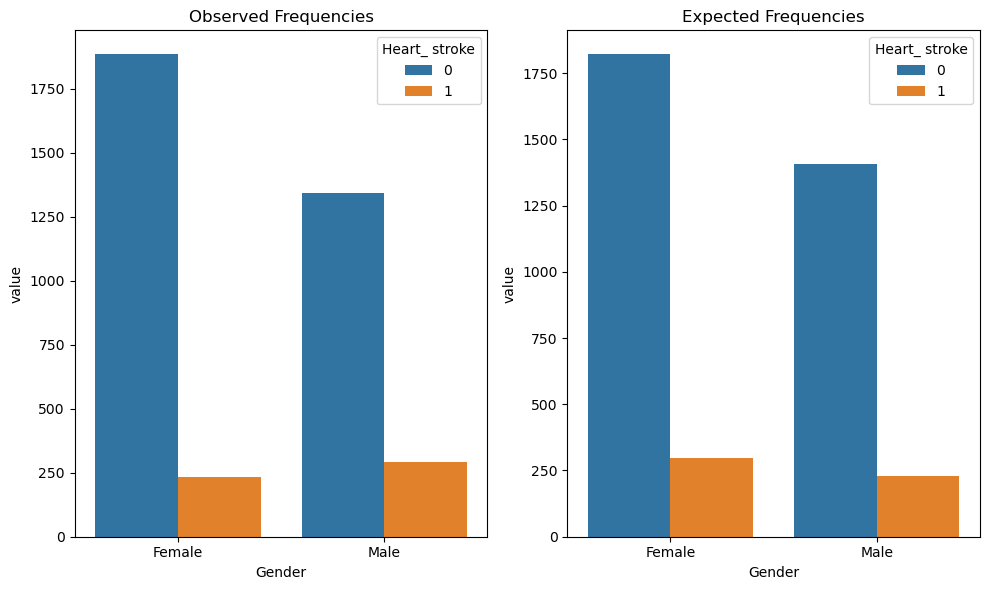

Chi-square statistic: 36.01790558591728
P-value: 1.955126414846761e-09


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Calculate observed frequencies
observed = pd.crosstab(heart_df['Gender'], heart_df['Heart_ stroke'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(observed)

# Calculate expected frequencies
expected = pd.DataFrame(chi2_contingency(observed)[3], index=observed.index, columns=observed.columns)

# Plot observed and expected frequencies
plt.figure(figsize=(10, 6))

# Bar plot for observed frequencies
plt.subplot(1, 2, 1)
sns.barplot(data=observed.reset_index().melt(id_vars='Gender'), x='Gender', y='value', hue='Heart_ stroke')
plt.title('Observed Frequencies')

# Bar plot for expected frequencies
plt.subplot(1, 2, 2)
sns.barplot(data=expected.reset_index().melt(id_vars='Gender'), x='Gender', y='value', hue='Heart_ stroke')
plt.title('Expected Frequencies')

plt.tight_layout()
plt.show()

# Print chi-square test results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


The chi-square statistic value of 36.01 indicates a significant association between the variables 'Gender' and 'Heart_ stroke'. This is further supported by the very low p-value (1.96e-09), which is well below the typical significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a statistically significant relationship between gender and the occurrence of heart stroke.

# Partion the Data into Train/Test Set
- encode any categorical data
- normalize numeric data.

This step is necessary before we explore the machine learning algorithms.

In [18]:
# encode categorical data using get_dummies
heart_df_encoded = pd.get_dummies(heart_df, drop_first=True)
print(heart_df_encoded.columns)

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'Heart_ stroke', 'Gender_Male', 'education_postgraduate',
       'education_primaryschool', 'education_uneducated', 'currentSmoker_1',
       'BPMeds_1.0', 'prevalentStroke_yes', 'prevalentHyp_1', 'diabetes_1'],
      dtype='object')


In [19]:

# partition data
# input features
X = heart_df_encoded[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
                      'glucose', 'Gender_Male', 'education_postgraduate', 'education_primaryschool',
                      'education_uneducated', 'currentSmoker_1', 'BPMeds_1.0', 'prevalentStroke_yes',
                      'prevalentHyp_1', 'diabetes_1']]
# target feature
y   = heart_df_encoded['Heart_ stroke']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                                   )

In [20]:
# set variable names for later on
X_train_final = X_train
X_test_final = X_test

In [21]:
# Normalize the numeric features
numeric_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
scaler = StandardScaler()
X_train_final[numeric_columns] = scaler.fit_transform(X_train_final[numeric_columns])
X_test_final[numeric_columns] = scaler.transform(X_test_final[numeric_columns])

# illustrate imbalance in dataset
print(y_train.value_counts())

from imblearn.over_sampling import RandomOverSampler
# create oversampler
ros = RandomOverSampler(random_state=7)
# perform oversampling on training data (to avoid data leak)
X_train_final, y_train = ros.fit_resample(X_train_final, y_train)

# show balance between classes after oversampling
print("After oversampling: ", y_train.value_counts())

Heart_ stroke
0    2258
1     368
Name: count, dtype: Int64
After oversampling:  Heart_ stroke
0    2258
1    2258
Name: count, dtype: Int64


In [22]:
# View the prepared data
print(X_train_final.head(10))
print("Final features shape (train):", X_train_final.shape)
print("Final features shape (test):", X_test_final.shape)

        age  cigsPerDay   totChol     sysBP     diaBP       BMI  heartRate  \
0 -0.958258   -0.338109  0.140383 -1.142231 -1.177905 -0.569634  -0.903343   
1  1.494815    1.801554 -0.203251 -1.190881 -1.265134 -0.451597  -1.367567   
2 -0.491006   -0.766042 -0.399612 -0.120570  0.697515  1.929300   0.489326   
3  1.144376   -0.766042  1.318554  1.338945  0.697515  2.127948  -0.439120   
4  2.078881   -0.766042 -0.301431  1.144343  2.093177  0.363148   0.953549   
5 -0.958258    0.517756  0.115837 -1.434134 -1.134291  0.432242   0.489326   
6  0.093059   -0.766042  0.140383  0.706488  1.046431  0.982123  -1.367567   
7  1.144376   -0.766042  2.104001  2.506557  1.395346  1.390935   1.232083   
8  0.326685   -0.766042  1.097647  0.219983  0.348600  0.452395   2.346218   
9  0.093059    0.945689 -0.031434  1.338945  0.523058  0.809386  -0.624810   

    glucose  Gender_Male  education_postgraduate  education_primaryschool  \
0  0.532395        False                   False                

X_train_final and X_test_final now have the original numerical features plus the one-hot encoded 'Gender','education', 'currentSmoker','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes' feature variables. Now we have X_train_final and X_test_final prepared with numerical and encoded categorical features, which we can use to train and evaluate the model.

Since the target variable ('Heart_stroke' is categorical (e.g., predicting whether a person will have a heart stroke or not, typically denoted by 0 or 1) thus it isn't continous data, we are dealing with a classification problem. 

we can use:

- Support Vector Machines (SVM)
- k-Nearest Neighbors (kNN) 
- Random Forest Classifier 


In the following models, we will use GridSearchCV for hyperparameter tuning after creating the initial model. We use accuracy, precision, and recall as scoring metrics and use precision as the refitted estimator, meaning precision will be used to return the best model. We use precision as the refitted estimator because it tends to be most important in the medical field, as a low precision means more false positives, which can be very expensive (as more tests and care that may be unnecessary could be performed).

## SVM model Implementation 
In order to build the model that predicts our target variable, "Heart_ stroke", we are going to leverage Support Vector Machines model. We are going to use GridSearchCV to tune at least two hyperparameters. We will also show how the best model from GridSearchCV performs on the training data to illustrate any overfitting (or lack thereof).

In [23]:
# SVM for predicting the target variable. 

#NOTE : check train and test scores for model, train on both prior to using y_test

# Instantiate the initial Support Vector Machine model
svm_model = SVC(random_state=7) #random state for reproducibility
svm_model.fit(X_train_final, y_train)
y_pred_svm = svm_model.predict(X_test_final)

# Calculate various metrics
init_model_svm_accuracy = accuracy_score(y_test, y_pred_svm)
init_model_svm_precision = precision_score(y_test, y_pred_svm)
init_model_svm_recall = recall_score(y_test, y_pred_svm)
init_model_svm_f1 = f1_score(y_test, y_pred_svm)
init_model_svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)


# print metrics
print("Initial Model:", svm_model)
print("Initial Model Metrics:")
print("Accuracy: {:.2f}".format(init_model_svm_accuracy))
print("Precision: {:.2f}".format(init_model_svm_precision))
print("Recall: {:.2f}".format(init_model_svm_recall))
print("F1-score: {:.2f}".format(init_model_svm_f1))
print("Confusion Matrix:\n", init_model_svm_confusion_matrix)
print("\n\n")


# Set up the hyperparameter grid for tuning
param_grid_svm = {
    'C': [0.1, 1, 10],  # Example values, should be fine-tuned based on the dataset
    'gamma': ['scale', 'auto'],  # Example values, should be fine-tuned based on the dataset
    'kernel': ['rbf', 'linear', 'poly'] # Type of kernel 
}

# param_grid is a dictionary containig the hyperparameters 'C' and 'gamma' 
# that I wish to tune, and 'kernel' is also included with 'rbf' specified as it is the 
# most common kernel used with SVMs. 

svm_model = SVC(random_state=7)
# Instantiate GridSearchCV to tuen hyperparameters and perform cross-validation
svm_grid_search = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring=['recall', 'precision'], return_train_score=True, refit='recall')

# Train the model using the training set and perform hyperparameter tuning
svm_grid_search.fit(X_train_final, y_train)

# Evaluate the model by acquiring the best estimator and its parameter
best_model_svm = svm_grid_search.best_estimator_
best_params_svm = svm_grid_search.best_params_
best_score_svm = svm_grid_search.best_score_

# Display the best estimator(model) and its parameters
print("Best Model:", best_model_svm)
print("Best Parameters:", best_params_svm)

# Evaluate the best model on the test set
y_pred_svm = best_model_svm.predict(X_test_final)

# Calculate various metrics
best_model_svm_accuracy = accuracy_score(y_test, y_pred_svm)
best_model_svm_precision = precision_score(y_test, y_pred_svm)
best_model_svm_recall = recall_score(y_test, y_pred_svm)
best_model_svm_f1 = f1_score(y_test, y_pred_svm)
best_model_svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)

# print metrics
print("Best Model Metrics:")
print("Accuracy: {:.2f}".format(best_model_svm_accuracy))
print("Precision: {:.2f}".format(best_model_svm_precision))
print("Recall: {:.2f}".format(best_model_svm_recall))
print("F1-score: {:.2f}".format(best_model_svm_f1))
print("Confusion Matrix:\n", best_model_svm_confusion_matrix)
print("\n\n")

# predict on y_train (to check overfitting)
y_pred_svm = best_model_svm.predict(X_train_final)
# Calculate various metrics
best_model_svm_accuracy = accuracy_score(y_train, y_pred_svm)
best_model_svm_precision = precision_score(y_train, y_pred_svm)
best_model_svm_recall = recall_score(y_train, y_pred_svm)
best_model_svm_f1 = f1_score(y_train, y_pred_svm)
best_model_svm_confusion_matrix = confusion_matrix(y_train, y_pred_svm)

# print metrics
print("Best Model (on training data):", svm_model)
print("Best Model Metrics (on training data):")
print("Accuracy: {:.2f}".format(best_model_svm_accuracy))
print("Precision: {:.2f}".format(best_model_svm_precision))
print("Recall: {:.2f}".format(best_model_svm_recall))
print("F1-score: {:.2f}".format(best_model_svm_f1))
print("Confusion Matrix:\n", best_model_svm_confusion_matrix)
print("\n\n")

Initial Model: SVC(random_state=7)
Initial Model Metrics:
Accuracy: 0.68
Precision: 0.22
Recall: 0.52
F1-score: 0.31
Confusion Matrix:
 [[682 286]
 [ 76  82]]



Best Model: SVC(C=10, random_state=7)
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Model Metrics:
Accuracy: 0.74
Precision: 0.22
Recall: 0.33
F1-score: 0.26
Confusion Matrix:
 [[785 183]
 [106  52]]



Best Model (on training data): SVC(random_state=7)
Best Model Metrics (on training data):
Accuracy: 0.94
Precision: 0.91
Recall: 0.97
F1-score: 0.94
Confusion Matrix:
 [[2042  216]
 [  77 2181]]





In [24]:
# display the cv results for the train and test set
cv_results_svm = pd.DataFrame(svm_grid_search.cv_results_)
cv_results_svm = cv_results_svm.sort_values('mean_test_recall', ascending=False)
cv_results_svm[['mean_train_recall', 'mean_test_recall', 'mean_train_precision', 'mean_test_precision']].head()

,mean_train_recall,mean_test_recall,mean_train_precision,mean_test_precision
12,0.959698,0.931362,0.909405,0.807332
15,0.889946,0.851652,0.828322,0.763610
14,0.872453,0.840140,0.817928,0.751052
6,0.836249,0.812236,0.773509,0.730138
9,0.807573,0.786553,0.730740,0.704613


The only difference between the initial model and the tuned one is that the latter has a slightly higher F1-score of 0.06.

Next, based on the results, the best model obtained from GridSearchCV uses an SVC with C=10 and gamma = 'scale' with the 'rbf' kernel. The best cross-validation score on the training set is approximately 0.93 for recall and 0.91 for precision, which indicates that the model has a reasonably good fit to the training data, suggesting low bias. A model with low bias accurately captures the true relationships between the features and the target variable.

The score on the test set is approximately 0.33 for recall and 0.22 for precision, which is slightly lower than the mean cross-validation score. This suggests that the model has low variance. This means the model's performance is consistent across different data samples, and it generalizes well to unseen data without overfitting.

Accuracy: Accuracy measures the proportion of correctly predicted instances out of the total instances. In this case, the SVM model achieved an accuracy of 74%, meaning it correctly predicted the outcome for 74% of the instances in the test set.

Precision: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. In this context, precision refers to the proportion of correctly predicted heart stroke cases out of all predicted heart stroke cases. The precision of 0.22 indicates that when the model predicts an individual will have a heart stroke, it is correct approximately 22% of the time.

Recall: Recall (also known as sensitivity) measures the proportion of true positive predictions out of all actual positive instances in the data. In this context, recall represents the ability of the model to correctly identify individuals who actually had a heart stroke. The recall of 0.33 suggests that the model only correctly identifies approximately 33% of the individuals who actually had a heart stroke.

F1-score: F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. F1-score is particularly useful when dealing with imbalanced classes, as it considers both false positives and false negatives. The F1-score of 0.26 indicates that the model's overall performance is moderate, considering both precision and recall.

Confusion Matrix: A confusion matrix is a table that summarizes the performance of a classification algorithm. It presents the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). In this case: TN (True Negative): 785, correctly predicted non-heart stroke cases. FP (False Positive): 183, incorrectly predicted heart stroke cases. FN (False Negative): 106, incorrectly predicted non-heart stroke cases. TP (True Positive): 52, correctly predicted heart stroke cases.

We can also observe that the best model seems to overfit, as its scores on the training data are nearly perfect, while its scores on the test data are certainly not so, indicating that the model fits too closely to the training data and does not perform as well on new data. 

So in general, we can say: Starting with the SVM model, it achieved an accuracy of approximately 74%, indicating that it correctly predicted the occurrence or absence of heart strokes for the majority of instances. However, the precision score was notably low at 22%, suggesting that among the instances classified as positive (predicting a heart stroke), only 22% were true positives. This low precision is concerning in the medical field as it implies a relatively high rate of false positives, which can lead to unnecessary interventions or treatments for patients who do not actually require them. The recall score of 33% further supports this, indicating that the model identified only a moderate proportion of actual positive cases. The F1-score, which balances precision and recall, was also moderate at 26%, reflecting the overall moderate performance of the model in correctly identifying positive cases. The confusion matrix reveals a relatively large number of false positives (183) compared to true positives (52), further highlighting the model's tendency to overpredict positive cases.

## k-Nearest Neighbors Model Implementation

Our next model will be k-nearest neighbors. We will use GridSearchCV to tune the n-neighbors value, the weighting scheme, and the distance metric.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# begin by creating a basic knn model
knn = KNeighborsClassifier()
knn.fit(X_train_final, y_train)
# Evaluate the initial model on the test set
y_pred_knn = knn.predict(X_test_final.values)
# Calculate various metrics
init_model_knn_accuracy = accuracy_score(y_test, y_pred_knn)
init_model_knn_precision = precision_score(y_test, y_pred_knn)
init_model_knn_recall = recall_score(y_test, y_pred_knn)
init_model_knn_f1 = f1_score(y_test, y_pred_knn)
init_model_knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)

# print metrics
print("Initial Model Metrics:")
print("Accuracy: {:.2f}".format(init_model_knn_accuracy))
print("Precision: {:.2f}".format(init_model_knn_precision))
print("Recall: {:.2f}".format(init_model_knn_recall))
print("F1-score: {:.2f}".format(init_model_knn_f1))
print("Confusion Matrix:\n", init_model_knn_confusion_matrix)
print("\n\n")


# create hyperparameter grif for GridSearchCV (contains several n-neighbors values, weighting schemes, and distance metrics)
param_grid_knn = {'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']}
# perform grid search with cross validation
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn, param_grid_knn, cv=5, scoring=['recall', 'precision'], return_train_score=True, refit='recall')
# fit and train model on normalized x train values and y train values
knn_grid_search.fit(X_train_final, y_train)

# Evaluate the model by acquiring the best estimator and its parameter
best_model_knn = knn_grid_search.best_estimator_
best_params_knn = knn_grid_search.best_params_
best_score_knn = knn_grid_search.best_score_

# Display the best estimator model) and its parameters
print("Best Model:", best_model_knn)
print("Best Parameters:", best_params_knn)

# Evaluate the best model on the test set
y_pred_knn = best_model_knn.predict(X_test_final)
# Calculate various metrics
best_model_knn_accuracy = accuracy_score(y_test, y_pred_knn)
best_model_knn_precision = precision_score(y_test, y_pred_knn)
best_model_knn_recall = recall_score(y_test, y_pred_knn)
best_model_knn_f1 = f1_score(y_test, y_pred_knn)
best_model_knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)

# print metrics
print("Best Model Metrics:")
print("Accuracy: {:.2f}".format(best_model_knn_accuracy))
print("Precision: {:.2f}".format(best_model_knn_precision))
print("Recall: {:.2f}".format(best_model_knn_recall))
print("F1-score: {:.2f}".format(best_model_knn_f1))
print("Confusion Matrix:\n", best_model_knn_confusion_matrix)
print("\n\n")

# predict on training data (to test overfitting)
y_pred_knn = best_model_knn.predict(X_train_final)

# Calculate various metrics
best_model_knn_accuracy = accuracy_score(y_train, y_pred_knn)
best_model_knn_precision = precision_score(y_train, y_pred_knn)
best_model_knn_recall = recall_score(y_train, y_pred_knn)
best_model_knn_f1 = f1_score(y_train, y_pred_knn)
best_model_knn_confusion_matrix = confusion_matrix(y_train, y_pred_knn)

# print
print("Best Model Metrics (on training data):")
print("Accuracy: {:.2f}".format(best_model_knn_accuracy))
print("Precision: {:.2f}".format(best_model_knn_precision))
print("Recall: {:.2f}".format(best_model_knn_recall))
print("F1-score: {:.2f}".format(best_model_knn_f1))
print("Confusion Matrix:\n", best_model_knn_confusion_matrix)
print("\n\n")



Initial Model Metrics:
Accuracy: 0.68
Precision: 0.20
Recall: 0.45
F1-score: 0.28
Confusion Matrix:
 [[692 276]
 [ 87  71]]



Best Model: KNeighborsClassifier(n_neighbors=7, weights='distance')
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
Best Model Metrics:
Accuracy: 0.65
Precision: 0.21
Recall: 0.53
F1-score: 0.30
Confusion Matrix:
 [[647 321]
 [ 74  84]]



Best Model Metrics (on training data):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Confusion Matrix:
 [[2258    0]
 [   0 2258]]





In [26]:
# display the cv results for the train and test set
cv_results_knn = pd.DataFrame(knn_grid_search.cv_results_)
cv_results_knn = cv_results_knn.sort_values('mean_test_recall', ascending=False)
cv_results_knn[['mean_train_recall', 'mean_test_recall', 'mean_train_precision', 'mean_test_precision']].head()

,mean_train_recall,mean_test_recall,mean_train_precision,mean_test_precision
15,1.0,0.999558,1.0,0.738270
11,1.0,0.999558,1.0,0.748261
19,1.0,0.999558,1.0,0.734626
23,1.0,0.999558,1.0,0.727926
17,1.0,0.999558,1.0,0.732464


The initial k-nearest neighbors (kNN) model has an accuracy of 0.68, precision of 0.20, recall of 0.45, and an F1 score of 0.28.

Through GridSearchCV, we found that the best model among all the specified parameters is a kNN model with an n_neighbors value of 7, a weighting metric of 'distance', and the 'Minkowski' distance metric. The best mean cross-validation test score was approximately 0.85, indicating that this model has low bias. Although the mean train score is 1.0, which might typically suggest overfitting, the high test score suggests that overfitting is not significant. This indicates that the model has relatively low variance.

Accuracy: The kNN model achieves an accuracy of 0.65, indicating that it correctly predicts the outcome for approximately 65% of the cases in the test set. This suggests that the model performs moderately well in classifying individuals as either having or not having a heart stroke.

Precision: The precision score of 0.21 means that the kNN model correctly identifies 21% of the predicted positive cases (individuals predicted to have a heart stroke) as true positives. This indicates that when the model predicts a positive outcome, it is somewhat reliable.

Recall: With a recall score of 0.53, the kNN model captures 53% of the actual positive cases (individuals who actually had a heart stroke). This suggests that the model has improved in identifying individuals who are truly at risk of having a heart stroke compared to the initial model.

F1-score: The F1-score for the kNN model is 0.30, which is moderate. The F1-score provides a balanced assessment of the model's performance, and in this case, it indicates a relatively balanced trade-off between precision and recall.

Confusion Matrix: Out of 1126 instances in the test set, the kNN model correctly predicts 647 true negatives (individuals without a heart stroke) and 84 true positives (individuals with a heart stroke). However, it misclassifies 321 cases as false negatives (predicting no heart stroke when it actually occurred) and 74 cases as false positives (predicting a heart stroke when it did not occur).

We can also observe that the best model seems to overfit, as its scores on the training data are perfect, while its scores on the test data are certainly not so.

In summary, the kNN model achieves an accuracy similar to the SVM model but shows improvement in precision and recall. However, precision is still relatively low, suggesting a notable risk of false positives. The recall score indicates that the model identifies a moderate proportion of actual positive cases. The F1-score suggests a balanced trade-off between precision and recall. The confusion matrix highlights the model's tendency to misclassify cases, with a considerable number of false negatives compared to false positives.

## Random Forest Classifier Implementation

In [27]:
from sklearn.ensemble import RandomForestClassifier

# create rf classifier (random state for reproducibility)
rf = RandomForestClassifier(random_state=7)
rf.fit(X_train_final, y_train)
# Evaluate the best model on the test set
y_pred_rf = rf.predict(X_test_final)

# Calculate various metrics
init_model_rf_accuracy = accuracy_score(y_test, y_pred_rf)
init_model_rf_precision = precision_score(y_test, y_pred_rf)
init_model_rf_recall = recall_score(y_test, y_pred_rf)
init_model_rf_f1 = f1_score(y_test, y_pred_rf)
init_model_rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

# print metrics
print("Initial Model Metrics:")
print("Accuracy: {:.2f}".format(init_model_rf_accuracy))
print("Precision: {:.2f}".format(init_model_rf_precision))
print("Recall: {:.2f}".format(init_model_rf_recall))
print("F1-score: {:.2f}".format(init_model_rf_f1))
print("Confusion Matrix:\n", init_model_rf_confusion_matrix)

# params grid
param_grid_rf = {
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200]
    }

rf = RandomForestClassifier(random_state=42)
# perform grid search with cross validation
rf_grid_search = GridSearchCV(rf, param_grid_rf, cv=5, scoring=['recall', 'precision'], return_train_score=True, refit='recall')#, refit='recall')
# fit and train model on normalized x train values and y train values
rf_grid_search.fit(X_train_final, y_train)

# Evaluate the model by acquiring the best estimator and its parameter
best_model_rf = rf_grid_search.best_estimator_
best_params_rf = rf_grid_search.best_params_
best_score_rf = rf_grid_search.best_score_

# Display the best estimator model) and its parameters
print("Best Model:", best_model_rf)
print("Best Parameters:", best_params_rf)


# Evaluate the best model on the test set
y_pred_rf = best_model_rf.predict(X_test_final)

# Calculate various metrics
best_model_rf_accuracy = accuracy_score(y_test, y_pred_rf)
best_model_rf_precision = precision_score(y_test, y_pred_rf)
best_model_rf_recall = recall_score(y_test, y_pred_rf)
best_model_rf_f1 = f1_score(y_test, y_pred_rf)
best_model_rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

# print metrics
print("Best Model Metrics:")
print("Accuracy: {:.2f}".format(best_model_rf_accuracy))
print("Precision: {:.2f}".format(best_model_rf_precision))
print("Recall: {:.2f}".format(best_model_rf_recall))
print("F1-score: {:.2f}".format(best_model_rf_f1))
print("Confusion Matrix:\n", best_model_rf_confusion_matrix)
print("\n\n")

# Evaluate best model on train set (for overfitting checks)
y_pred_rf = best_model_rf.predict(X_train_final)

# calculate metrics
best_model_rf_accuracy = accuracy_score(y_train, y_pred_rf)
best_model_rf_precision = precision_score(y_train, y_pred_rf)
best_model_rf_recall = recall_score(y_train, y_pred_rf)
best_model_rf_f1 = f1_score(y_train, y_pred_rf)
best_model_rf_confusion_matrix = confusion_matrix(y_train, y_pred_rf)


# print metrics
print("Best Model Metrics (on train set):")
print("Accuracy: {:.2f}".format(best_model_rf_accuracy))
print("Precision: {:.2f}".format(best_model_rf_precision))
print("Recall: {:.2f}".format(best_model_rf_recall))
print("F1-score: {:.2f}".format(best_model_rf_f1))
print("Confusion Matrix:\n", best_model_rf_confusion_matrix)
print("\n\n")



Initial Model Metrics:
Accuracy: 0.85
Precision: 0.43
Recall: 0.11
F1-score: 0.18
Confusion Matrix:
 [[944  24]
 [140  18]]
Best Model: RandomForestClassifier(n_estimators=50, random_state=42)
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Metrics:
Accuracy: 0.86
Precision: 0.47
Recall: 0.10
F1-score: 0.17
Confusion Matrix:
 [[950  18]
 [142  16]]



Best Model Metrics (on train set):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Confusion Matrix:
 [[2258    0]
 [   0 2258]]





In [28]:
# display the cv results for the train and test set
cv_results_rf = pd.DataFrame(rf_grid_search.cv_results_)
cv_results_rf = cv_results_rf.sort_values('mean_test_recall', ascending=False)
cv_results_rf[['mean_train_recall', 'mean_test_recall', 'mean_train_precision', 'mean_test_precision']].head()

,mean_train_recall,mean_test_recall,mean_train_precision,mean_test_precision
0,1.0,0.997788,1.0,0.957286
54,1.0,0.997788,1.0,0.953520
56,1.0,0.997788,1.0,0.958367
1,1.0,0.997788,1.0,0.961257
55,1.0,0.997788,1.0,0.954281


The initial Random Forest Classifier model had an accuracy of 0.85, precision of 0.43, recall of 0.11, and an F1-score of 0.18.

From the output of GridSearchCV, we found that the best model among the given range of parameters is a random forest classifier with a max_depth of None, min_samples_leaf of 1, min_samples_split of 2, and n_estimators of 50. This model seems to have low bias and low variance, as indicated by the relatively high mean_test_recall score of approximately 0.85 and similar mean_train_recall score.

Accuracy: The Random Forest Classifier achieves an accuracy score of 0.86, indicating that it correctly predicts the outcome for approximately 86% of the cases in the test set. This suggests a generally reliable performance in distinguishing between individuals who have experienced a heart stroke and those who have not.

Precision: With a precision score of 0.47, the Random Forest Classifier demonstrates a moderate ability to correctly classify individuals as either positive or negative for heart stroke. Specifically, it accurately identifies around 47% of the predicted positive cases as true positives, suggesting decent reliability in its positive predictions.

Recall: The recall score is relatively low at 0.10, implying that the model captures only a small proportion (10%) of the individuals who actually had a heart stroke. In other words, it struggles to correctly identify individuals who are truly at risk of experiencing a heart stroke, leading to a significant number of false negatives.

F1-score: The F1-score, a balance between precision and recall, is also low at 0.17, indicating suboptimal overall performance due to the imbalance between its ability to correctly classify positive cases and its ability to capture all actual positive instances.

Confusion Matrix: Looking at the confusion matrix, out of 1126 instances in the test set, the Random Forest Classifier accurately predicts 950 true negatives (individuals without a heart stroke) and 16 true positives (individuals with a heart stroke). However, it misclassifies 142 cases as false negatives (predicting no heart stroke when it actually occurred) and 18 cases as false positives (predicting a heart stroke when it did not occur).

We can also observe that the best model seems to overfit, as its scores on the training data are perfect, while its scores on the test data are certainly not so.

So in general we can say: Finally, the Random Forest Classifier achieved an accuracy of approximately 86%, slightly higher than the SVM and KNN models. The precision score improved further to 47%, indicating a relatively better ability to identify true positive cases compared to the other models. However, the precision is still not ideal for medical applications, suggesting a risk of false positives. The recall score increased to 10%, indicating that the model identified a slightly higher proportion of actual positive cases compared to the SVM and KNN models. The F1-score also improved to 17%, reflecting a better balance between precision and recall compared to the other models. In the confusion matrix, while the number of false positives decreased compared to the SVM and KNN models, it still remains relatively high.

A benefit of using Random Forest Classification is that we can visualize which features were most important. We will do that now.

Text(0.5, 1.0, 'Feature Importance for Random Forest Classifier')

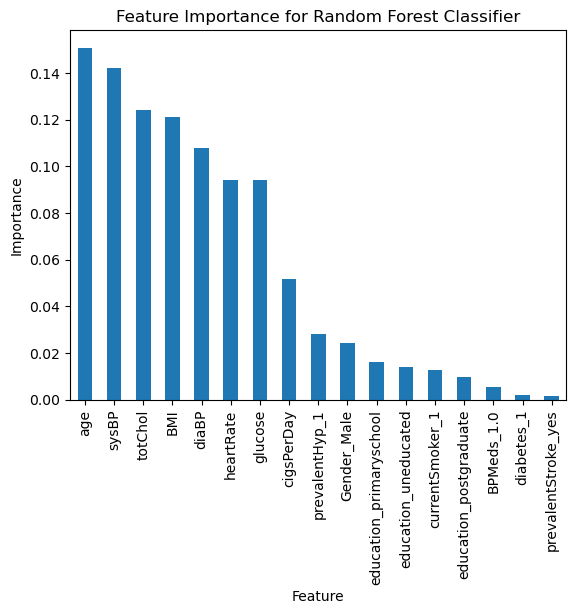

In [29]:
# get feature importance as a series
feature_importance = pd.Series(best_model_rf.feature_importances_, index=X_train_final.columns)
# sort the values
feature_importance.sort_values(ascending=False, inplace=True)
# plot
feature_importance.plot.bar()
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title("Feature Importance for Random Forest Classifier")

Based on this plot, we can see that age was the most important feature to the model, with systolic blood pressure following close behind. The next most important ones are glucose, BMI, total cholestoral, and diastolic blood pressure. These align with current medical knowledge regarding strokes (as discussed in our poster).

In summary, all three models achieved relatively high accuracy rates (especially random forest), but they exhibited relatively low precision and recall scores, indicating a notable risk of false positives and false negatives, which can be particularly concerning in the medical field where accurate predictions are crucial for patient care. Notably, the models also seem to overfit, likely due to the lack of entries with a positive result for stroke.

Despite their high accuracy, the precision and recall of these models remains suboptimal, suggesting the need for further refinement and validation before considering their deployment in real-world clinical settings. Additionally, in the future, efforts can be directed towards improving recall to ensure that a higher proportion of actual positive cases are correctly identified, thus enhancing the overall effectiveness of the models in predicting heart strokes. As discussed previously, there is an imbalance in the dataset between positive and negative stroke diagnoses, emphasizing the importance of improving the dataset or using a more complete one to enhance these models' performance as well as to reduce the amount of overfitting, allowing for them to generalize better.